# Comparison of Symbolic Defaults to Constant Default and Random Search

Produces an image similar to:

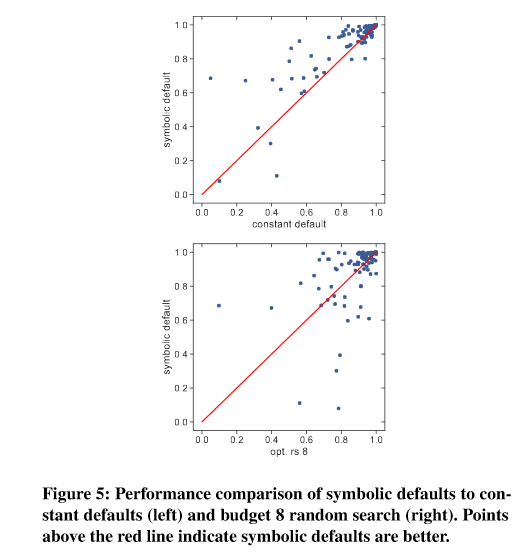

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [57]:
import os
os.mkdir("generated/Figure5")

In [2]:
surrogate_performance = pd.read_csv("surrogate_performance.csv", sep=';', header=0)
opt_random_search = pd.read_csv("optimistic_random_search.csv", sep=';', header=0)
all_methods = pd.concat([surrogate_performance, opt_random_search])

In [21]:
def category_from_row(row):
    if '_' in row['optimizer']:
        return row['optimizer'].replace('_', ' ')
    elif row['optimizer'] == "mupluslambda":
        if row['constants']:
            return "constant default"
        else:
            return "symbolic default"
    else:
        raise ValueError(f"Unknown category for {row}")

all_methods["optimizer"] = all_methods.apply(category_from_row, axis=1)

ValueError: Could not interpret value `constant default` for parameter `x`

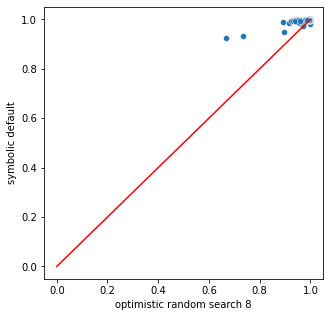

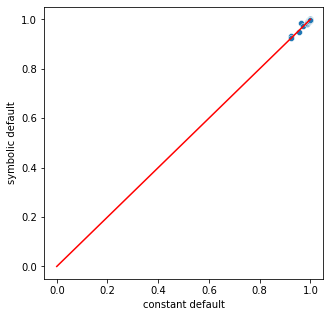

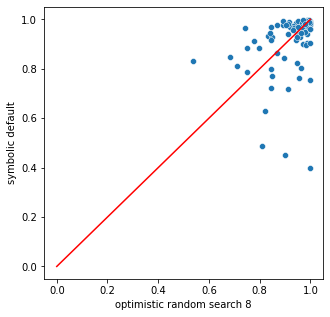

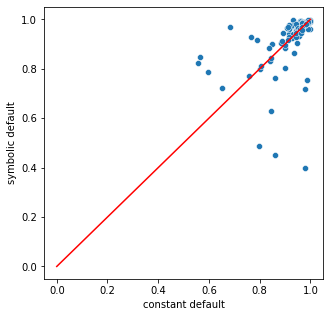

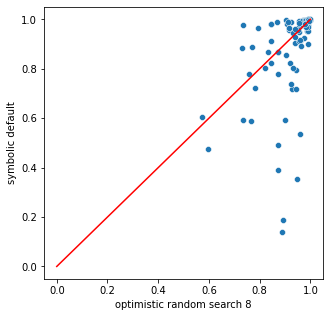

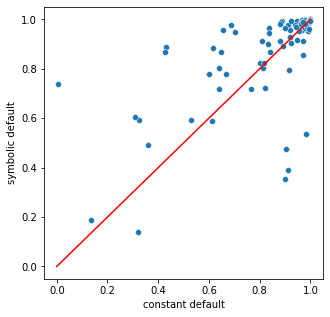

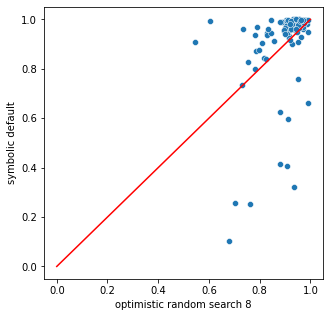

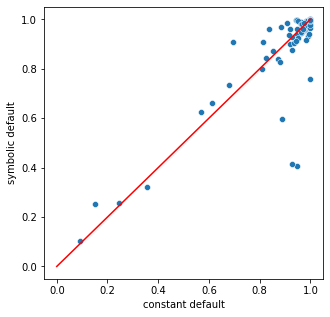

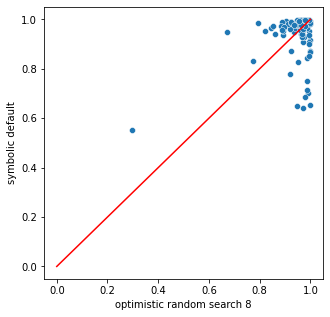

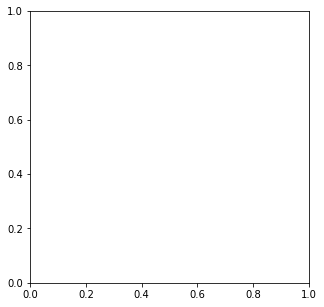

In [61]:
for learner in all_methods.learner.unique():
    results = all_methods[all_methods.learner == learner]
    results = results.pivot(index='task', columns='optimizer', values='surrogate_score')
    
    for comparison_method in ["optimistic random search 8", "constant default"]:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
        sns.scatterplot(data=results, x=comparison_method, y="symbolic default", ax=ax)
        sns.lineplot(x=[0, 1], y=[0, 1], color='red', ax=ax)
        figpath = f"generated/Figure5/{learner}_symbolic_v_{comparison_method.replace(' ','_')}.pdf"
        plt.savefig(figpath, bbox_inches='tight', pad_inches=.1)

In [63]:
results = all_methods[all_methods.learner == "xgboost"]
results = results.pivot(index='task', columns='optimizer', values='surrogate_score')

In [64]:
results

optimizer,constant default,optimistic random search 16,optimistic random search 2,optimistic random search 32,optimistic random search 4,optimistic random search 8,sklearn default,symbolic default
task,,,,,,,,
3,0.9936,0.969352,0.878666,0.982957,0.922188,0.945186,0.8957,0.9954
6,0.9630,0.952048,0.667106,0.973965,0.778329,0.913688,0.4689,0.9858
11,0.9911,0.987983,0.971044,0.991308,0.977071,0.983578,0.9671,0.9908
12,0.9995,0.997762,0.969524,0.998737,0.983096,0.994741,0.9684,0.9994
14,0.9989,0.994658,0.967059,0.997366,0.979444,0.991947,0.9700,0.9987
...,...,...,...,...,...,...,...,...
189924,0.9968,0.997677,0.991712,0.998595,0.993932,0.996303,0.9919,0.9992
189927,0.9968,0.996852,0.973836,0.998629,0.985954,0.993651,0.9651,0.9972
189928,0.9935,0.973719,0.916637,0.984503,0.940163,0.957923,0.9070,0.9946


In [ ]:
ax

<AxesSubplot:xlabel='constant default', ylabel='symbolic default'>

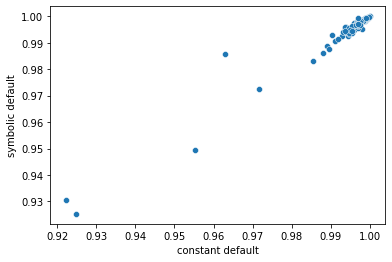

In [65]:
sns.scatterplot(data=results, x=comparison_method, y="symbolic default")